# Домашнее задание по курсу анализа данных # 2
Версия от 14.11.2021

Всего 50 баллов = 50 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 06.12.2021  23:59**

**Жесткий дедлайн: 11.12.2021  23:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

# Парсим рейтинг преподавателей с Вики-Физтех

<div class="alert alert-info">
    
Итак, перед вами **VIKI-MIPT** - сборник отзывов о кафедрах и преподавателях МФТИ: ` http://wikimipt.org/wiki/ `

Эта кладезь отзывов не раз давала студентам оценить психологический портрет потенциальных экзаменаторов и преподавателей. 
    
    
<img src="../lessons/images/wiki_mipt_front.PNG" height="300" width="1300"> 



# Описание задачи: 

**Задача** - собрать данные по всем текущим преподавателям всех `институтских кафедр` МФТИ.

Собранный датасет должен представлять из себя `.csv` файл со следующими полями:

* `full_name` - ФИО преподавателя
* `birth_day` - Дата рождения преподавателя
*  `teach_place` - Кафедра
*  `degree`- Ученая Степень
* `knowledge` - Знания
*  `teaching_skill` - Умение преподавать	
* `commication_skill` - В общении	
* `easy_exam` - «Халявность»	
* `overall_score` - Общая оценка

<img src="../lessons/images/wiki_mipt_info.PNG" height="300" width="300"> 

**Комментарий:** - Знание, умение преподавать, в общение, "Халявность" и Общая оценка можно найти странице каждого преподавателя. 

<div class="alert alert-warning">
    
Финальный балл складывается из трех частей:

* Cобранный датасет (выложить архивом на гитхаб)
* python кода, которым был собран датасет (выложить на гитхаб)
* Окуратный и понятный код с комментариями
    
    
**Дополнительные + 10 баллов можно получить за кластеризацию преподавателей, используя только оценки из собранных данных**

# Возможный алгоритм обхода для сбора данных:

In [1]:
# 0 - Открываем с помощью Selenium клавную страницу вики-Физтех- http://wikimipt.org/wiki/   
# 1 - Получаем список кафедр с главной страницу вики-Физтех    
# Обходя список кафедр, "проваливаемся" в каждую страницу кафедру кликом по названию кафедры
#     2 - Получаем список преподавателей
#         Обходя список преподавателей "Проваливаемся" на страницу преподавателя по ФИО преподавателя
#             3 - Получаем табличку данных с характеристмиками преподавателями и прочу необходимую информацию. 
#             Записываем в pandas dataframe
# Сохраняем данные в .csv файл

In [97]:
import pandas as pd
from selenium import webdriver
import time

from tqdm.auto import tqdm

from matplotlib import pyplot as plt

In [32]:
import requests
from bs4 import BeautifulSoup

teachers = {}

path_CDM = '../data/chromedriver'

try:
    URL = 'http://wikimipt.org/wiki'
    driver = webdriver.Chrome(path_CDM)

    driver.get(URL)

    soup = BeautifulSoup(driver.page_source, 'lxml')

    departments = soup.find(style="column-count: auto; column-width: 21rem;").find_all('a')

    for d in tqdm(departments):
        print(d.text)
        link = 'http://wikimipt.org/wiki/' + d.get('href').split('/')[-1]
        dep = driver.get(link)
        dep_page = BeautifulSoup(driver.page_source, 'html.parser') 
        try:
            preps = dep_page.find(style="-moz-column-count:3; column-count:3; -webkit-column-count:3").find_all('a')
        except:
            preps = dep_page.find_all(class_="gallerytext")

        for prep in tqdm(preps):

            try:
                link_prep = 'http://wikimipt.org/wiki/' + prep.find('a').get('href').split('/')[-1]
            except:
                link_prep = 'http://wikimipt.org/wiki/' + prep.get('href').split('/')[-1]

    #         p = requests.get(link_prep)
    #         prep_page = BeautifulSoup(p.content, 'lxml') 

            driver.get(url=link_prep)
            time.sleep(2)                                                                                                  # 2 сек пауза, чтобы успели прогрузиться "звездочки"
            prep_page = BeautifulSoup(driver.page_source, "lxml")     

            name = prep_page.find(id="firstHeading").text

            try:
                db = prep_page.find("th", string="Дата рождения\n").find_next_sibling().text
            except AttributeError:
                db = None

            try:
                caf = prep_page.find("th", string="Работает\n").find_next_sibling().text
            except AttributeError:
                caf = None

            try:
                deg = prep_page.find("th", string="Учёная степень\n").find_next_sibling().text
            except AttributeError:
                deg = None

            try:
                stars = prep_page.find_all(class_="ratingsinfo-avg")
                knowledge = stars[0].text
                teaching_skill = stars[1].text
                commication_skill = stars[2].text
                easy_exam = stars[3].text 
                overall_score = stars[4].text
                print(name, overall_score)
            except IndexError:
                print('no stars')
                knowledge = None
                teaching_skill = None
                commication_skill = None
                easy_exam = None 
                overall_score = None

            teachers[name] = [db, caf, deg, knowledge, teaching_skill, commication_skill, easy_exam, overall_score]

except Exception as e:
    print('Ошибка')
    print(e)

finally:
    driver.quit()  # закрываем браузер после всех манипуляций
    print('Закрыл')

    print(preps)

C:\Users\ada\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  # Remove the CWD from sys.path while we load stuff.


  0%|          | 0/17 [00:00<?, ?it/s]

Кафедра высшей математики


  0%|          | 0/175 [00:00<?, ?it/s]

Агаханов Назар Хангельдыевич 4.80 (54)
Агаханова Яна Сергеевна 4.82 (55)
Алексеев Василий Антонович 4.80 (10)
Амосов Григорий Геннадьевич 4.00 (14)
Андреев Михаил Юрьевич 3.71 (14)
Арутюнов Андроник Арамович 3.75 (60)
Арутюнов Арам Владимирович 3.80 (15)
Астафуров Глеб Олегович 5.00 (3)
Балабанов Юрий Вячеславович 
Балицкий Алексей Михайлович 4.55 (11)
Барабанщиков Александр Владимирович 4.54 (13)
Беляев Виссарион Викторович 3.57 (7)
Беляев Сергей Анатольевич 4.33 (12)
Бесов Олег Владимирович 3.35 (23)
Беспорточный Александр Иванович 4.86 (14)
Бишаев Александр Михайлович 4.34 (47)
Богданов Илья Игоревич 4.44 (66)
Боговский Михаил Евгеньевич 3.46 (13)
Браницкая Лидия Леонидовна 1.00 (1)
Булинский Андрей Вадимович 3.06 (35)
Бунаков Андрей Эрикович 4.18 (34)
Бурмистров Александр Николаевич 4.17 (23)
Бурский Владимир Петрович 4.64 (33)
Бурцев Алексей Анатольевич 4.21 (52)
Бычков Алексей Станиславович 4.50 (4)
Висков Олег Викторович 4.00 (3)
Волков Борис Олегович 4.41 (17)
Воронин Илья Викт

  0%|          | 0/190 [00:00<?, ?it/s]

Аветисов Ашот Аршавирович 2.25 (8)
Агеев Никита Дмитриевич 4.13 (8)
Аланакян Юрий Робертович 4.11 (19)
Александров Дмитрий Анатольевич 4.77 (35)
Алескеров Имран Арифович 4.56 (57)
Алябьева Людмила Николаевна 4.50 (12)
Аникин Юрий Александрович 2.98 (47)
Антропов Александр Сергеевич 4.20 (10)
Арсеньев Андрей Романович 2.96 (26)
Атаулин Виталий Эдуардович 2.00 (1)
Бабинцев Владимир Александрович 4.50 (22)
Беляков Владимир Алексеевич 4.00 (2)
Берюлёва Нина Степановна 5.00 (1)
Бродский Андрей Юрьевич 
Булыгин Владимир Семёнович 4.29 (41)
Бурков Владимир Иванович 
Бурлуцкая Елена Васильевна 1.96 (47)
Быков Александр Андреевич 3.95 (19)
Вановский Владимир Валерьевич 3.18 (17)
Васильев Борис Иванович 3.75 (4)
Вахитов Руслан Ришатович 4.12 (17)
Веревочкин Юрий Георгиевич 4.06 (47)
Виноградов Станислав Владиленович 4.61 (23)
Воробьев Александр Семенович 4.83 (29)
Ворона Назар Александрович 4.68 (19)
Воронов Артем Анатольевич 4.29 (7)
Выборов Андрей Константинович 4.50 (8)
Гавриков Андрей Владим

  0%|          | 0/28 [00:00<?, ?it/s]

Болейко Гелена Михайловна 4.24 (17)
Васильева Татьяна Михайловна 3.08 (24)
Вечерук Георгий Викторович 2.38 (8)
Гнатко Надежда Николаевна 2.10 (29)
Киреев Виктор Борисович 1.90 (10)
Николаева Тамара Борисовна 4.00 (1)
Стожков Владимир Юрьевич 4.27 (41)
Талисманов Владимир Сергеевич 4.25 (36)
Фесенко Татьяна Николаевна 3.17 (12)
Алехин Анатолий Павлович 
Балакин Константин Валерьевич 5.00 (2)
Винник Светлана Александровна 
Головина Галина Васильевна 
Журавлева Светлана Евгеньевна 3.25 (8)
Зеленцов Вячеслав Васильевич 
Зеленцова Светлана Александровна 5.00 (1)
Казакова Ольга Андреевна 4.00 (1)
Лапушкин Георгий Иванович 4.61 (23)
Латышева Людмила Анатольевна 5.00 (1)
Ольховский Владимир Иванович 
Семеренко Лариса Викторовна 3.10 (10)
Серикбаев Александр Кутжанович 3.67 (3)
Сигарёв Андрей Алексеевич 3.25 (12)
Снигирёва Елена Михайловна 4.00 (2)
Сомова Ирина Константиновна 
Строеску Анна Константиновна 
Токнова Валентина Федоровна 
Убоженко Олег Дементьевич 2.36 (14)
Кафедра информатики


  0%|          | 0/67 [00:00<?, ?it/s]

Алексеев Василий Антонович 4.80 (10)
Бабичев Сергей Леонидович 4.50 (24)
Бабичева Татьяна Сергеевна 4.00 (7)
Барский Евгений Яковлевич 
Беклемышева Катерина Алексеевна 4.29 (17)
Васюков Алексей Викторович 4.69 (13)
Винокуров Никита Алексеевич 4.17 (12)
Владимиров Константин Игоревич 4.17 (12)
Ворожцов Артём Викторович 
Воронцов Игорь Андреевич 2.67 (3)
Ворощук Денис Николаевич 5.00 (1)
Вязовик Николай Александрович 
Ганин Геннадий Васильевич 
Гетьман Александр Олегович 3.17 (6)
Горшков Тимофей Владимирович 5.00 (4)
Грицуляк Роман Тарасович 
Дединский Илья Рудольфович 4.45 (142)
Дербакова Елена Павловна 2.67 (3)
Дербышева Татьяна Николаевна 4.38 (21)
Ефанов Николай Николаевич 4.67 (3)
Захаренков Алексей Сергеевич 2.09 (11)
Исходжанов Тимур Равилевич 5.00 (2)
Казеннов Иван Максимович 3.81 (16)
Квасов Игорь Евгеньевич 3.33 (3)
Кобец Алексей Леонидович 
Коваленко Игорь Викторович 
Коротин Павел Николаевич 1.67 (9)
Красильников Николай Иванович 4.33 (6)
Кудинова Марина Викторовна 3.40 (10)


  0%|          | 0/92 [00:00<?, ?it/s]

Абрамова Ксения Борисовна 
Абубакирова Наталия Петровна 4.56 (9)
Аленькина Татьяна Борисовна 2.00 (4)
Артамонова Екатерина Александровна 4.60 (5)
Артюхина Тамара Ивановна 3.00 (4)
Бажина Таисия Александровна 4.78 (9)
Барли Надежда Константиновна 4.00 (8)
Бартницкая Людмила Ричардовна 2.00 (1)
Бирюкова Елена Викторовна 4.57 (7)
Борисова Галина Ивановна 3.00 (1)
Булдакова Надежда Николаевна 4.43 (7)
Бурмистрова Надежда Степановна 3.00 (2)
Владимирова Евгения Олеговна 4.57 (7)
Гудкова Ольга Владимировна 4.88 (8)
Денисова Анна Юрьевна 4.00 (3)
Довгяло Елена Евгеньевна 
Есакова Светлана Викторовна 4.33 (3)
Зарецкая Вера Михайловна 
Зотова Евгения Александровна 4.44 (9)
Кабанова Надежда Валерьевна 4.78 (23)
Казеннова Екатерина Георгиевна 3.80 (5)
Камчатнова Ольга Александровна 
Караваева Надежда Александровна 
Карцева Ольга Вячеславовна 3.33 (9)
Кирилова Людмила Ивановна 
Кислова Ольга Геннадьевна 
Климова Марина Анатольевна 4.50 (2)
Кольцова Алена Сергеевна 3.67 (9)
Космодемьянская Ольга Ва

  0%|          | 0/37 [00:00<?, ?it/s]

Аристова Елена Николаевна 3.75 (8)
Барабанщиков Александр Владимирович 4.54 (13)
Богатов Андрей Валентинович 
Брагин Михаил Дмитриевич 5.00 (1)
Бухаров Константин Борисович 5.00 (1)
Васильев Михаил Олегович 5.00 (1)
Гойман Гордей Сергеевич 4.33 (6)
Демченко Владимир Владимирович 3.40 (5)
Демьянов Александр Юрьевич 4.33 (3)
Евдокимов Алексей Витальевич 
Завьялова Наталья Александровна 4.50 (12)
Кончаков Александр Михайлович 
Корытник Сергей Андреевич 
Косарев Виталий Иванович 
Кравченко Наталья Михайловна 
Куракин Вячеслав Александрович 2.57 (7)
Кучеренко Владимир Иванович 4.67 (3)
Лобанов Алексей Иванович 3.17 (6)
Панов Владимир Александрович 5.00 (3)
Петров Игорь Борисович 2.83 (6)
Пирогов Вячеслав Борисович 2.33 (3)
Прут Вениамин Вениаминович 3.30 (10)
Старожилова Татьяна Константиновна 
Тирский Григорий Александрович 3.00 (3)
Толстых Андрей Игоревич 
Тормасов Александр Геннадьевич 
Уткин Павел Сергеевич 5.00 (2)
Хирьянова Александра Игоревна 5.00 (1)
Цыбулин Иван Владимирович 4.14 (

  0%|          | 0/66 [00:00<?, ?it/s]

Абаимов Сергей Германович 4.75 (8)
Аврутский Всеволод Игоревич 3.25 (12)
Ахмедов Эмиль Тофикович 3.86 (21)
Барабанов Алексей Леонидович 4.63 (8)
Белемук Александр Михайлович 4.14 (7)
Белоусов Юрий Михайлович 3.50 (10)
Бурмистров Игорь Сергеевич 1.00 (1)
Бурмистров Сергей Николаевич 3.40 (5)
Вагнер Сергей Александрович 2.50 (2)
Вайнберг Владимир Маркович 4.33 (9)
Валиулин Валерий Эрижанович 4.29 (7)
Вергелес Сергей Никитович 3.75 (4)
Вергелес Сергей Сергеевич 3.67 (3)
Воронов Николай Александрович 3.57 (7)
Герштейн Семён Соломонович 4.36 (14)
Гец Артем Викторович 3.10 (39)
Гешкенбейн Борис Владимирович 
Гозман Михаил Игоревич 4.00 (5)
Домарецкий Даниил Рубикович 4.63 (16)
Дорофеев Евгений Александрович 4.75 (4)
Дорофеенко Александр Викторович 4.88 (16)
Дубовский Леонид Борисович 3.50 (6)
Загороднев Игорь Витальевич 3.29 (7)
Зайцев Рагдай Олегович 1.00 (1)
Зябловский Александр Андреевич 4.00 (5)
Иванов Михаил Геннадьевич 4.56 (16)
Ирошников Георгий Саввич 
Киселёв Валерий Валерьевич 5.00

  0%|          | 0/43 [00:00<?, ?it/s]

Амелькин Николай Иванович 4.43 (21)
Батхин Александр Борисович 4.73 (22)
Зараменских Ирина Евгеньевна 4.64 (25)
Иванов Александр Павлович 2.35 (17)
Иванов Данил Сергеевич 4.71 (21)
Козьминых Валерий Аркадьевич 4.52 (33)
Кузнецов Александр Михайлович 2.71 (7)
Куприянова Надежда Валерьевна 4.67 (3)
Маркеев Анатолий Павлович 4.87 (30)
Маштаков Ярослав Владимирович 4.40 (25)
Монахова Ульяна Владимировна 4.40 (5)
Муницына Мария Александровна 3.24 (50)
Нунупаров Армен Мартынович 3.57 (7)
Овчинников Михаил Юрьевич 1.67 (3)
Притыкин Дмитрий Аркадьевич 4.56 (27)
Сахаров Александр Вадимович 4.81 (21)
Семендяев Сергей Вячеславович 4.61 (23)
Сидоренко Владислав Викторович 3.71 (7)
Синев Александр Николаевич 4.13 (8)
Скороход Сергей Анатольевич 5.00 (1)
Соколов Сергей Викторович 3.38 (26)
Соловьев Анатолий Алексеевич 3.54 (13)
Ткачёв Степан Сергеевич 3.74 (23)
Трухан Надежда Михайловна 4.60 (5)
Фомичев Александр Владимирович 4.66 (32)
Ханукаев Юрий Исламович 3.95 (21)
Холостова Ольга Владимировна 4

  0%|          | 0/31 [00:00<?, ?it/s]

Абдулгамидов Низами Абдулгамидович 3.50 (2)
Арумов Георгий Петрович 4.00 (5)
Болтарь Константин Олегович 
Воронов Евгений Валентинович 3.29 (7)
Григорьев Александр Алексеевич 4.89 (19)
Денисов Юрий Валентинович 
Донов Геннадий Иннокентьевич 4.44 (27)
Дубовецкий Андрей Зигмундович 
Дудкин Павел Валентинович 2.67 (3)
Елохин Роман Юрьевич 5.00 (1)
Иващенко Олег Игоревич 3.40 (15)
Колыбельников Александр Иванович 4.33 (6)
Красавин Александр Алексеевич 4.00 (2)
Медова Луиза Руслановна 4.83 (18)
Поляков Андрей Евгеньевич 
Русскин Сергей Олегович 4.75 (4)
Семака Вадим Юрьевич 2.63 (8)
Стрыгин Леонид Васильевич 4.50 (6)
Суханов Александр Алексеевич 2.56 (9)
Сысоев Игорь Юрьевич 4.00 (1)
Шаповалов Александр Николаевич 
Владимиров Сергей Михайлович 3.44 (9)
Габидулин Эрнст Мухамедович 2.67 (3)
Куклев Леонид Петрович 3.43 (7)
Кшевецкий Александр Сергеевич 
Озёрский Юрий Павлович 1.00 (1)
Рождественский Василий Владимирович 4.00 (1)
Самохина Марина Андреевна 
Сенюта Антон Александрович 
Трушина Ок

  0%|          | 0/30 [00:00<?, ?it/s]

Автайкин Сергей Владимирович 
Алипов Сергей Владимирович 1.50 (2)
Баранов Артём Александрович 4.20 (5)
Березникова Марина Владимировна 4.71 (7)
Быков Александр Андреевич 3.95 (19)
Завьялов Иван Николаевич 3.75 (4)
Извеков Олег Ярославович 4.00 (8)
Кузьменко Вера Михайловна 4.20 (5)
Кучук Александр Александрович 4.50 (8)
Молчанов Владимир Сергеевич 4.20 (5)
Негодяев Сергей Серафимович 5.00 (2)
Попов Леонид Леонидович 1.56 (9)
Рыжак Евгений Измайлович 5.00 (4)
Рыжаков Михаил Викторович 4.25 (4)
Скорик Герта Игоревна 2.33 (3)
Скрылев Александр Витальевич 2.22 (9)
Терентьев Максим Владимирович 1.00 (1)
Титаров Сергей Иванович 2.00 (5)
Щербаков Владимир Николаевич 3.80 (5)
Автайкин Максим Владимирович 5.00 (2)
Бранец Владимир Николаевич 
Геогджаев Владимир Оганесович 3.00 (2)
Кондауров Владимир Игнатьевич 1.00 (1)
Коротков Евгений Сергеевич 
Лаптева Надежда Николаевна 5.00 (1)
Носов Данила Сергеевич 3.67 (3)
Садов Валерий Владимирович 
Ткаченко Борис Константинович 1.00 (1)
Ширко Игорь Влад

  0%|          | 0/6 [00:00<?, ?it/s]

Аминов Владимир Алексеевич 
Жиляков Михаил Николаевич 
Киреева Анастасия Викторовна 
Клещевская Ирина Геннадьевна 
Кожура Руслан Вячеславович 
Надеждин Борис Борисович 4.00 (10)
Кафедра физического воспитания и спорта


  0%|          | 0/46 [00:00<?, ?it/s]

Анна Викторовна Маркова 4.80 (5)
Безделов Эдуард Анатольевич 3.40 (5)
Белокринкина Валентина Алексеевна 4.14 (7)
Бодунова Анастасия Андреевна 
Бортневская Любовь Александровна 4.00 (9)
Бунин Анатолий Яковлевич 3.40 (5)
Бунин Денис Анатольевич 5.00 (3)
Волков Николай Петрович 4.14 (7)
Гаранина Светлана Васильевна 
Гусев Роман Анатольевич 4.50 (6)
Давыдов Алексей Викторович 4.64 (11)
Ермолаева Светлана Максимовна 5.00 (3)
Заболотская Любовь Сергеевна 2.89 (9)
Калинина Олеся Геннадьевна 5.00 (4)
Коломников Денис Александрович 3.20 (5)
Кондин Александр Александрович 4.25 (12)
Матвеев Владимир Александрович 3.33 (6)
Меликидзе Шота Акакиевич 4.76 (25)
Митрофанов Анатолий Владимирович 4.67 (9)
Мухаметова Надежда Львовна 4.67 (3)
Мякишев Владислав Александрович 4.00 (9)
Несчастнов Михаил Константинович 
Никишкин Владимир Александрович 
Панжин Алексей Леонидович 
Поляков Владимир Васильевич 
Попова Анна Сергеевна 4.00 (1)
Поспелов Дмитрий Анатольевич 
Пугаев Ярослав Викторович 4.33 (3)
Пыжов Ми

0it [00:00, ?it/s]

Кафедра системного анализа экономики


  0%|          | 0/23 [00:00<?, ?it/s]

Бойков Андрей Вячеславович 
Волков Юрий Николаевич 1.00 (1)
Гордеев Дмитрий Сергеевич 2.50 (2)
Григоров Владислав Эдуардович 
Деяшкин Александр Витальевич 
Зорин Андрей Юрьевич 
Касьян Геннадий Александрович 
Киреев Виктор Борисович 1.90 (10)
Клочков Владислав Валерьевич 3.00 (2)
Копылов Сергей Анатольевич 
Кудрявцев Денис Борисович 
Маслов Алексей Юрьевич 2.50 (4)
Николаенко Вячеслав Анатольевич 
Озол Дмитрий Игоревич 4.38 (16)
Пекарский Сергей Эдмундович 
Перепелкин Сергей Петрович 1.00 (1)
Покатович Елена Викторовна 5.00 (4)
Полежаев Алексей Васильевич 
Фридман Алла Александровна 1.00 (1)
Бирюков Сергей Иванович 5.00 (1)
Малеев Алексей Викторович 1.67 (3)
Савицкая Елена Владиславовна 
Шананин Александр Алексеевич 5.00 (1)
Военная кафедра


  0%|          | 0/6 [00:00<?, ?it/s]

Иванов Юрий Григорьевич 5.00 (1)
Кваченко Андрей Владимирович 3.50 (2)
Корнеев Виктор Александрович 5.00 (2)
Летуновский Сергей Владимирович 3.00 (2)
Пешев Андрей Леонидович 
Седов Борис Сергеевич 
Кафедра философии


  0%|          | 0/9 [00:00<?, ?it/s]

Ахтырский Дмитрий Константинович 1.00 (1)
Кобзев Артём Игоревич 2.50 (2)
Коцюба Вячеслав Иванович 4.00 (6)
Лаврова Алла Анатольевна 4.17 (6)
Лупандин Иван Владимирович 4.67 (6)
Петров Алексей Алексеевич 
Семёнов Юрий Иванович 
Скворчевский Константин Анатольевич 4.33 (6)
Котина Светлана Васильевна 
Высшая школа системного инжиниринга


  0%|          | 0/1 [00:00<?, ?it/s]

Бубнов Григорий Георгиевич 3.00 (1)
Закрыл
[<div class="gallerytext">
<p><a href="/index.php/%D0%91%D1%83%D0%B1%D0%BD%D0%BE%D0%B2_%D0%93%D1%80%D0%B8%D0%B3%D0%BE%D1%80%D0%B8%D0%B9_%D0%93%D0%B5%D0%BE%D1%80%D0%B3%D0%B8%D0%B5%D0%B2%D0%B8%D1%87" title="Бубнов Григорий Георгиевич">Бубнов Григорий Георгиевич</a>
</p>
</div>]


In [78]:
data = pd.DataFrame.from_dict(teachers, orient='index',
                       columns=['birth_day', 'teach_place', 'degree', 'knowledge', 
                                'teaching_skill', 'commication_skill', 'easy_exam', 
                                'overall_score']
                      ).reset_index().rename(columns = {'index': 'full_name'})

for c in ['birth_day', 'teach_place', 'degree',]:
    data[c] = data[c].apply(lambda x: x.replace('\n', '') if x != None else 'Not stated')
    
for c in ['knowledge', 'teaching_skill', 
          'commication_skill', 'easy_exam', 
          'overall_score']:
    print(c)
#     for i in range(len(data)):
#         print(data.iloc[i][c])
#         print(float(data.iloc[i][c].split(' ')[0]))
    data[c] = data[c].apply(lambda x: float(x.split(' ')[0])  if x != ''  else None)

knowledge
teaching_skill
commication_skill
easy_exam
overall_score


In [79]:
data.to_csv('result/all_teachers.csv')

In [80]:
import shutil

shutil.make_archive('result/all_teachers', 'zip', 'result')

'C:\\Users\\ada\\Maga\\mipt_data_science_2021\\home_works\\result\\all_teachers.zip'

# Кластеризация

In [82]:
features = ['knowledge', 'teaching_skill', 
          'commication_skill', 'easy_exam', 
          'overall_score'] #features for clustering

data_for_clust = data.dropna()

In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

answ_dict =  {}
for n_clusters in range(2, 15):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, max_iter=500)
    cluster_labels = clusterer.fit_predict(data_for_clust[features])
    print(n_clusters, silhouette_score(data_for_clust[features], cluster_labels))
    answ_dict[n_clusters] = silhouette_score(data_for_clust[features], cluster_labels)

2 0.5084236191522156
3 0.4182791730101991
4 0.3064373666463294
5 0.3184597155757417
6 0.32184271158236244
7 0.3135651356375989
8 0.28053671238649075
9 0.2649200788817115
10 0.2862517228672295
11 0.27035579511677277
12 0.27140626174044546
13 0.2493911845964441
14 0.26185881806999395


In [84]:
sorted_dict = {}
sorted_keys = sorted(answ_dict, key=answ_dict.get, reverse = True)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict[w] = answ_dict[w]

print(sorted_dict)

{2: 0.5084236191522156, 3: 0.4182791730101991, 6: 0.32184271158236244, 5: 0.3184597155757417, 7: 0.3135651356375989, 4: 0.3064373666463294, 10: 0.2862517228672295, 8: 0.28053671238649075, 12: 0.27140626174044546, 11: 0.27035579511677277, 9: 0.2649200788817115, 14: 0.26185881806999395, 13: 0.2493911845964441}


**Лучше всего два кластера** \
Посмотрим, какие преподаватели попали в каждый кластер

In [86]:
clusterer = KMeans(n_clusters=2, random_state=42, max_iter=500)
cluster_labels = clusterer.fit_predict(data_for_clust[features]) #номера калссов для каждого пользователя

data_for_clust['clust'] = cluster_labels
data_for_clust.head()

C:\Users\ada\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,full_name,birth_day,teach_place,degree,knowledge,teaching_skill,commication_skill,easy_exam,overall_score,clust
0,Агаханов Назар Хангельдыевич,25 июня 1954,Кафедра высшей математики,Кандидат физико-математических наук (1988),4.87,4.78,4.79,4.27,4.80,1
1,Агаханова Яна Сергеевна,Not stated,Кафедра высшей математики,Кандидат физико-математических наук (2007),4.52,4.64,4.85,4.81,4.82,1
2,Алексеев Василий Антонович,Not stated,Кафедра высшей математикиКафедра информатики,Not stated,4.70,4.60,4.70,4.40,4.80,1
3,Амосов Григорий Геннадьевич,27 ноября 1972,Кафедра высшей математики,Доктор физико-математических наук,4.42,3.42,4.33,4.44,4.00,1
4,Андреев Михаил Юрьевич,Not stated,Кафедра высшей математики,кандидат физико-математических наук,3.57,3.62,3.81,3.47,3.71,1


**Средние оценки преподавателей первого кластера**

In [102]:
data_for_clust[data_for_clust['clust'] == 0][features].mean()

knowledge            3.117596
teaching_skill       2.473880
commication_skill    2.608798
easy_exam            2.581475
overall_score        2.631585
dtype: float64

**Гистограммы**

array([[<AxesSubplot:title={'center':'knowledge'}>,
        <AxesSubplot:title={'center':'teaching_skill'}>],
       [<AxesSubplot:title={'center':'commication_skill'}>,
        <AxesSubplot:title={'center':'easy_exam'}>],
       [<AxesSubplot:title={'center':'overall_score'}>, <AxesSubplot:>]],
      dtype=object)

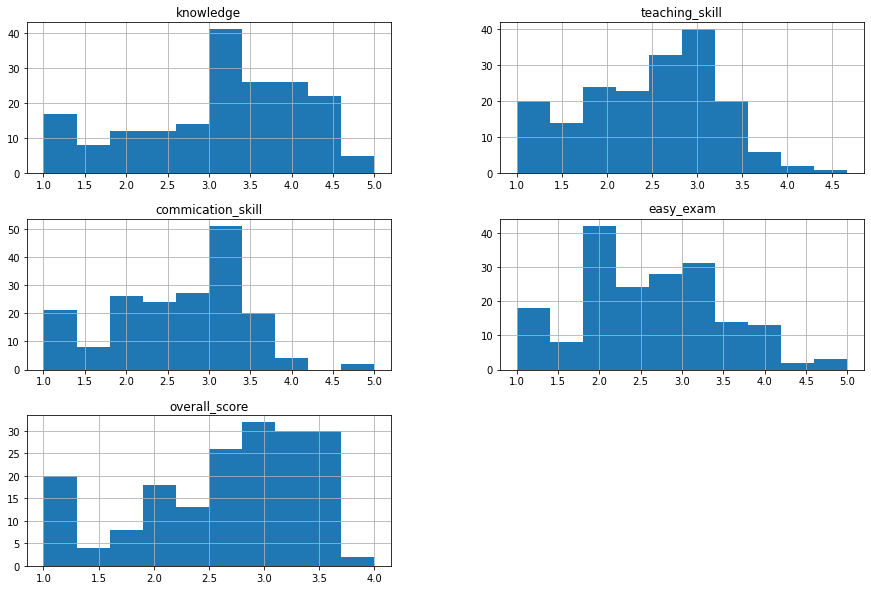

In [103]:
data_for_clust[data_for_clust['clust'] == 0][features].hist(figsize = (15, 10))

**Средние оценки преподавателей второго кластера**

In [101]:
data_for_clust[data_for_clust['clust'] == 1][features].mean()

knowledge            4.533807
teaching_skill       4.212407
commication_skill    4.419234
easy_exam            3.759475
overall_score        4.387462
dtype: float64

**Гистограммы**

array([[<AxesSubplot:title={'center':'knowledge'}>,
        <AxesSubplot:title={'center':'teaching_skill'}>],
       [<AxesSubplot:title={'center':'commication_skill'}>,
        <AxesSubplot:title={'center':'easy_exam'}>],
       [<AxesSubplot:title={'center':'overall_score'}>, <AxesSubplot:>]],
      dtype=object)

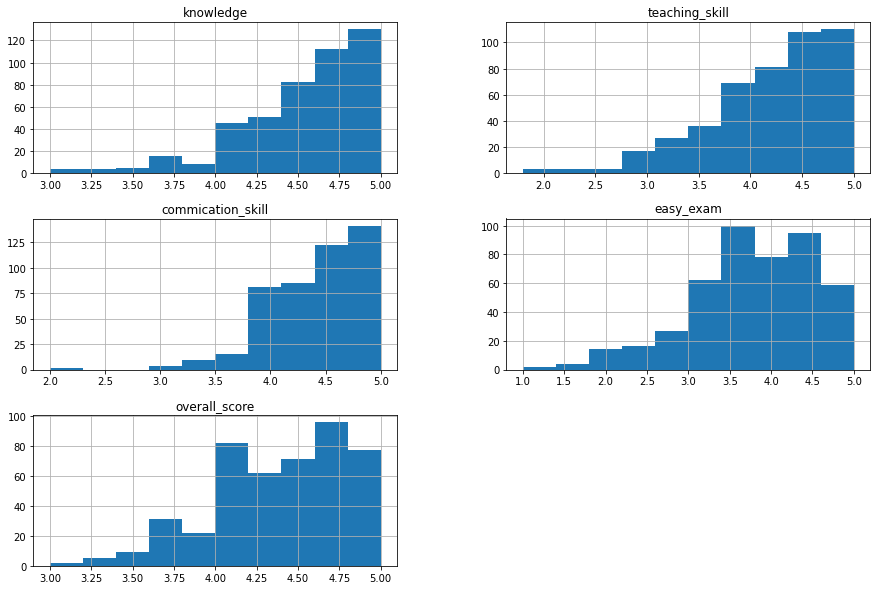

In [100]:
data_for_clust[data_for_clust['clust'] == 1][features].hist(figsize = (15, 10))

**Получается мы разделили преподавателей на хороших и не очень**

# Вспомогательные элементы для майнинга данных

* Библиотека `Selenium`: https://selenium-python.readthedocs.io/

Полезные методы и рекомендации:
    
* `element = browser.find_elements_by_*что угодно*()` # Поиск элемента на странице
* `element.click()` # Кликнуть по элементу (провалится по ссылке / расскрыть банер)
* `browser.back()` # Вернуться назад 
* `pd.read_html()` # Способ загрузить таблицку из html сразу в Pandas
* Спрашивать в чате или гуглить